# Proyecto Riders & Orders

El dataset utilizado es la recopilación de la cantidad de órdenes generadas a través de la app Pedidos Ya en la ciudad de Córdoba desde el 01 de enero de 2021 hasta el mes de agosto de 2022. 
Para poder hacer más eficientes los recursos de la empresa se ha decidido hacer un modelo predictivo de la cantidad de órdenes diarias generadas y así poder saber con cierta exactitud los recursos necesarios que se van a necesitar para cubrir esa demanda.

# Data understanding

In [1]:
#Importamos librerías

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score


#Generamos df con el dataset

df = pd.read_excel('ordenes.xlsx')

df.head()

,fecha,count_riders,Confirmed_orders,Cancelled_orders,AVG_delivery_time,AVG_dropoff_distance,AVG_acceptance_rate,working_hours,shifts_done,event_type,Precipitaciones en mm,Temp Max,Temp min,Presion Atmosferica,% de Hr,Nubosidad
0,2021-01-01,495,4941,380,23.50,1.52,0.91,2057.0,800.0,no_event,0.0,32.0,18.1,964.7,41.0,1.0
1,2021-01-02,598,7337,348,19.46,1.53,0.91,3701.0,1539.0,no_event,18.0,33.5,22.6,963.9,43.0,4.0
2,2021-01-03,598,8851,546,19.78,1.45,0.89,3405.0,1508.0,no_event,11.0,28.6,18.6,964.2,85.0,8.0
3,2021-01-04,573,6814,364,18.49,1.52,0.89,2822.0,1072.0,no_event,12.0,31.4,18.2,960.4,58.0,5.0
4,2021-01-05,544,7040,344,18.84,1.53,0.87,2816.0,952.0,no_event,0.0,28.2,17.0,963.8,73.0,6.0


In [2]:
df.shape

(658, 16)

In [3]:
#Chequeamos tipo de datos y nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658 entries, 0 to 657
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha                  658 non-null    datetime64[ns]
 1   count_riders           658 non-null    int64         
 2   Confirmed_orders       658 non-null    int64         
 3   Cancelled_orders       658 non-null    int64         
 4   AVG_delivery_time      658 non-null    float64       
 5   AVG_dropoff_distance   658 non-null    float64       
 6   AVG_acceptance_rate    658 non-null    float64       
 7   working_hours          658 non-null    float64       
 8   shifts_done            658 non-null    float64       
 9   event_type             658 non-null    object        
 10  Precipitaciones en mm  388 non-null    float64       
 11  Temp Max               388 non-null    float64       
 12  Temp min               388 non-null    float64       
 13  Presi

In [5]:
#Chequeamos nulos

df.isnull().sum()

fecha                      0
count_riders               0
Confirmed_orders           0
Cancelled_orders           0
AVG_delivery_time          0
AVG_dropoff_distance       0
AVG_acceptance_rate        0
working_hours              0
shifts_done                0
event_type                 0
Precipitaciones en mm    270
Temp Max                 270
Temp min                 270
Presion Atmosferica      270
% de Hr                  270
Nubosidad                270
dtype: int64

Se puede observar que el dataset cuenta con los datos del clima incompletos. Posee el clima para todo 2021, pero no para los meses del año 2022.

In [4]:
#Estadística descriptiva del df

df.describe(include='all').T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
fecha,658,604,2022-04-17 00:00:00,4,2021-01-01,2022-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count_riders,658.0,NaN,NaN,NaN,NaT,NaT,854.803951,129.157531,233.0,784.0,865.0,939.0,1972.0
Confirmed_orders,658.0,NaN,NaN,NaN,NaT,NaT,12068.493921,2297.232709,317.0,10597.25,12127.5,13572.0,26884.0
Cancelled_orders,658.0,NaN,NaN,NaN,NaT,NaT,565.837386,167.738851,6.0,445.0,545.5,647.75,1424.0
AVG_delivery_time,658.0,NaN,NaN,NaN,NaT,NaT,17.441322,1.073726,15.07,16.66,17.425,18.13,23.5
AVG_dropoff_distance,658.0,NaN,NaN,NaN,NaT,NaT,1.401459,0.177623,0.99,1.3325,1.4,1.44,3.81
AVG_acceptance_rate,658.0,NaN,NaN,NaN,NaT,NaT,0.909514,0.022105,0.83,0.89,0.91,0.93,0.96
working_hours,658.0,NaN,NaN,NaN,NaT,NaT,4105.047112,699.174131,113.0,3731.75,4098.5,4585.0,9674.0
shifts_done,658.0,NaN,NaN,NaN,NaT,NaT,1884.554711,485.426522,230.0,1515.25,1870.0,2151.75,3574.0
event_type,658,2,no_event,434,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Agrego columna con día de la semana
df['weekday'] = df['fecha'].dt.dayofweek
df.head()

,fecha,count_riders,Confirmed_orders,Cancelled_orders,AVG_delivery_time,AVG_dropoff_distance,AVG_acceptance_rate,working_hours,shifts_done,event_type,Precipitaciones en mm,Temp Max,Temp min,Presion Atmosferica,% de Hr,Nubosidad,weekday
0,2021-01-01,495,4941,380,23.50,1.52,0.91,2057.0,800.0,no_event,0.0,32.0,18.1,964.7,41.0,1.0,4
1,2021-01-02,598,7337,348,19.46,1.53,0.91,3701.0,1539.0,no_event,18.0,33.5,22.6,963.9,43.0,4.0,5
2,2021-01-03,598,8851,546,19.78,1.45,0.89,3405.0,1508.0,no_event,11.0,28.6,18.6,964.2,85.0,8.0,6
3,2021-01-04,573,6814,364,18.49,1.52,0.89,2822.0,1072.0,no_event,12.0,31.4,18.2,960.4,58.0,5.0,0
4,2021-01-05,544,7040,344,18.84,1.53,0.87,2816.0,952.0,no_event,0.0,28.2,17.0,963.8,73.0,6.0,1


# Agregamos Holidays

In [7]:
#Importo librería 'Holidays' para contar con una variable extra

from datetime import date
import holidays

In [8]:
#Agrego columna holidays para saber si es feriado o no

df['is_holiday'] = pd.Series(df['fecha']).apply(lambda x: holidays.CountryHoliday('AR').get(x)).values

#Paso valores a 1 = Feriado, 0 = No feriado
df['is_holiday'] = df['is_holiday'].astype('bool').astype('int')
df.head()

,fecha,count_riders,Confirmed_orders,Cancelled_orders,AVG_delivery_time,AVG_dropoff_distance,AVG_acceptance_rate,working_hours,shifts_done,event_type,Precipitaciones en mm,Temp Max,Temp min,Presion Atmosferica,% de Hr,Nubosidad,weekday,is_holiday
0,2021-01-01,495,4941,380,23.50,1.52,0.91,2057.0,800.0,no_event,0.0,32.0,18.1,964.7,41.0,1.0,4,1
1,2021-01-02,598,7337,348,19.46,1.53,0.91,3701.0,1539.0,no_event,18.0,33.5,22.6,963.9,43.0,4.0,5,0
2,2021-01-03,598,8851,546,19.78,1.45,0.89,3405.0,1508.0,no_event,11.0,28.6,18.6,964.2,85.0,8.0,6,0
3,2021-01-04,573,6814,364,18.49,1.52,0.89,2822.0,1072.0,no_event,12.0,31.4,18.2,960.4,58.0,5.0,0,0
4,2021-01-05,544,7040,344,18.84,1.53,0.87,2816.0,952.0,no_event,0.0,28.2,17.0,963.8,73.0,6.0,1,0


In [9]:
#Divido dataset para poder hacer análisis con los datos del clima (se tienen los datos hasta 30-12-2021)

df_analisis = df.iloc[:389,:]

In [10]:
#Calculamos dos nuevas columnas para saber promedio de órdenes por rider y amplitud térmica

df_analisis['Orders_per_rider'] = df_analisis['Confirmed_orders'] / df_analisis['count_riders']
df_analisis['Amplitud_Termica'] = df_analisis['Temp Max'] - df_analisis['Temp min']

df_analisis.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,fecha,count_riders,Confirmed_orders,Cancelled_orders,AVG_delivery_time,AVG_dropoff_distance,AVG_acceptance_rate,working_hours,shifts_done,event_type,Precipitaciones en mm,Temp Max,Temp min,Presion Atmosferica,% de Hr,Nubosidad,weekday,is_holiday,Orders_per_rider,Amplitud_Termica
0,2021-01-01,495,4941,380,23.50,1.52,0.91,2057.0,800.0,no_event,0.0,32.0,18.1,964.7,41.0,1.0,4,1,9.981818,13.9
1,2021-01-02,598,7337,348,19.46,1.53,0.91,3701.0,1539.0,no_event,18.0,33.5,22.6,963.9,43.0,4.0,5,0,12.269231,10.9
2,2021-01-03,598,8851,546,19.78,1.45,0.89,3405.0,1508.0,no_event,11.0,28.6,18.6,964.2,85.0,8.0,6,0,14.801003,10.0
3,2021-01-04,573,6814,364,18.49,1.52,0.89,2822.0,1072.0,no_event,12.0,31.4,18.2,960.4,58.0,5.0,0,0,11.891798,13.2
4,2021-01-05,544,7040,344,18.84,1.53,0.87,2816.0,952.0,no_event,0.0,28.2,17.0,963.8,73.0,6.0,1,0,12.941176,11.2


# Análisis univariado

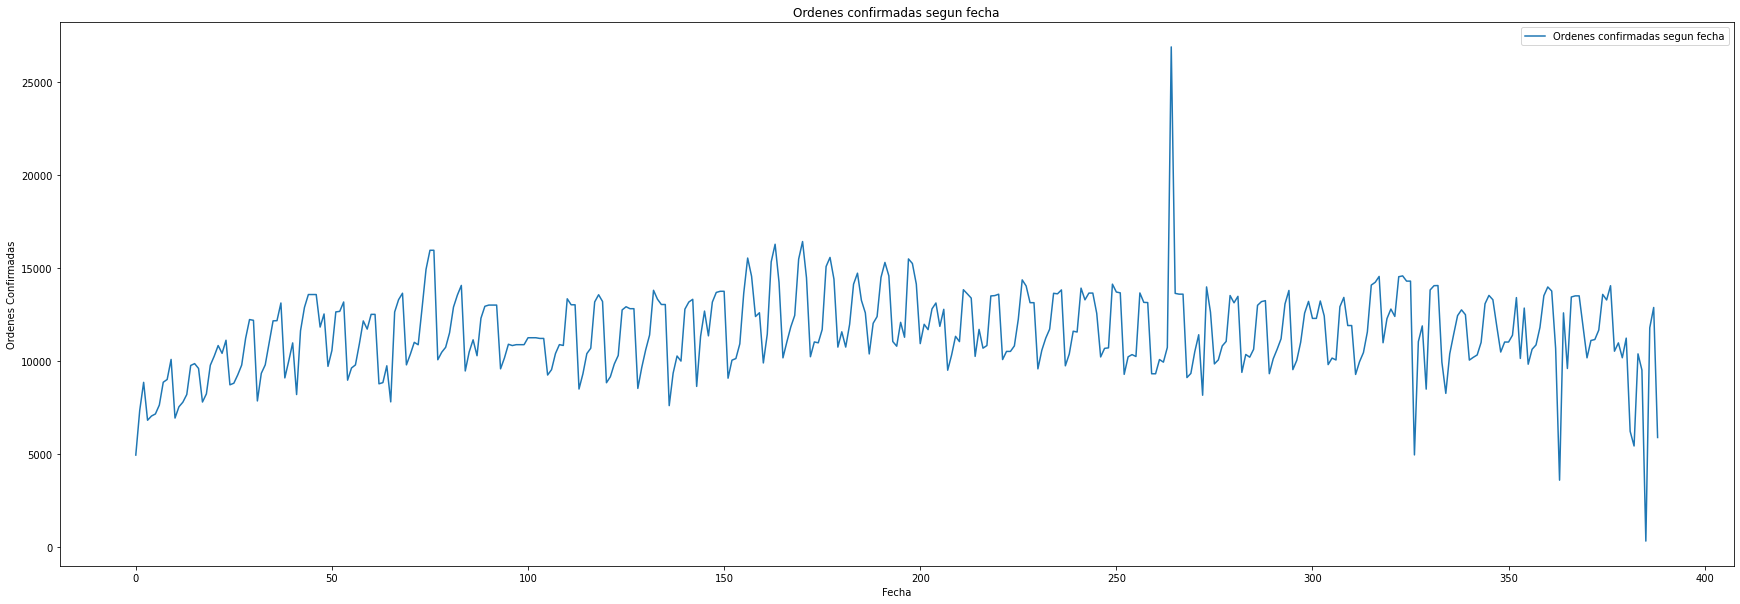

In [11]:
#Creamos línea de tiempo para visualizar la evolución de órdenes en cada mes

fig, ax2 = plt.subplots(figsize=(30,10))

ax2.plot(df_analisis.index.values, df_analisis['Confirmed_orders'], label='Ordenes confirmadas segun fecha');

ax2.set_xlabel('Fecha') #etiqueta del eje X
ax2.set_ylabel('Ordenes Confirmadas') #etiqueta del eje Y
ax2.set_title('Ordenes confirmadas segun fecha') #titulo
ax2.legend(); 

En base a este gráfico de línea podemos ver una tendencia creciente de las órdenes en la ciudad de Córdoba.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


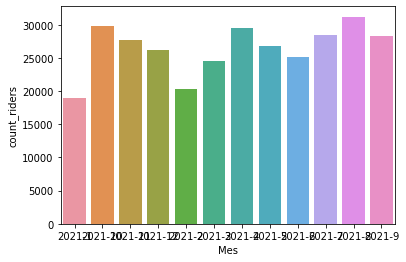

In [12]:
#Creamos gráfico de barras con la cantidad de órdenes en Nuevo Córdoba, la zona con más pedidos de la ciudad

df_analisis['fecha2'] = pd.to_datetime(df['fecha'], infer_datetime_format=True)
df_analisis['Mes'] = df_analisis['fecha2'].map(lambda x: '{}-{}'.format(x.year, x.month))

df3 = df_analisis.groupby(['Mes'])['count_riders'].sum().reset_index()

df3.sort_values(by='Mes')

sns.barplot(data=df3, x='Mes', y='count_riders')
sns.set(rc = {'figure.figsize':(40,10)})

plt.show()

En base a este histograma podemos analizar la cantidad de riders que se solicitaron en Cordoba y ver su evolucion mes contra mes.

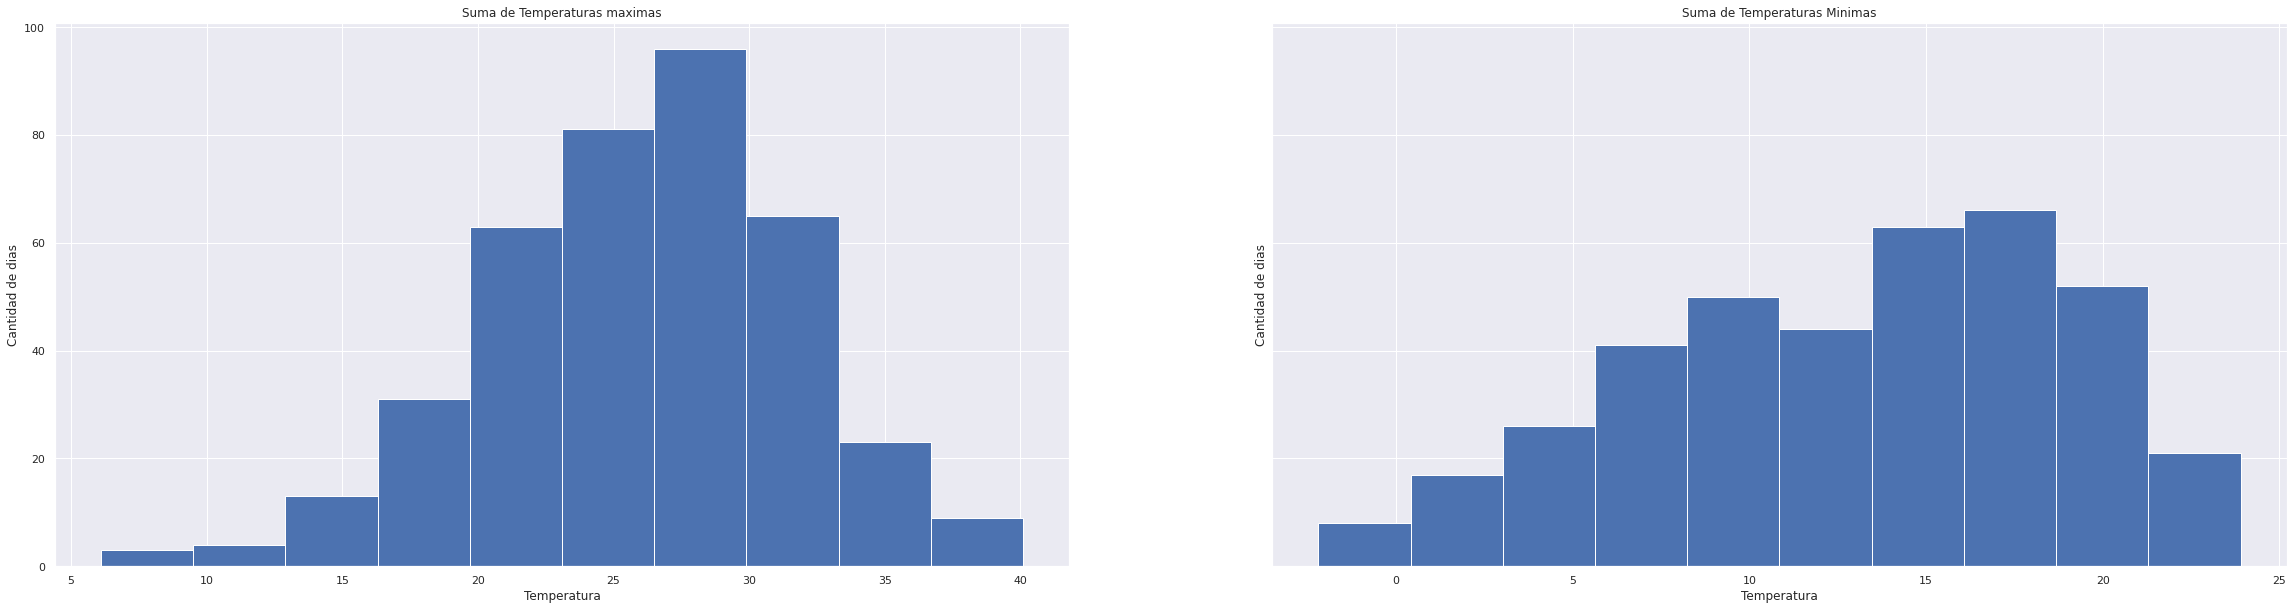

In [13]:
n_bins = 10

# Generate two normal distributions
dist1 = df_analisis['Temp Max']
dist2 = df_analisis['Temp min']

fig, ax1 = plt.subplots(1, 2, sharey=True)

ax1[0].set_title('Suma de Temperaturas maximas')
ax1[0].set_xlabel('Temperatura') #etiqueta del eje X
ax1[0].set_ylabel('Cantidad de dias') #etiqueta del eje Y 

ax1[1].set_title('Suma de Temperaturas Minimas')
ax1[1].set_xlabel('Temperatura') #etiqueta del eje X
ax1[1].set_ylabel('Cantidad de dias') #etiqueta del eje Y

# We can set the number of bins with the *bins* keyword argument.
ax1[0].hist(dist1, bins=n_bins)
ax1[1].hist(dist2, bins=n_bins);

Estos histogramas representan la cantidad de días de las temperaturas máximas (gráfico de la izquierda) y las temperaturas mínimas (gráfico de la derecha) en la ciudad de Córdoba de los últimos dos años.

En primera instancia se puede determinar que las temperaturas máximas han podido llegar a más de 40 grados, pero con pocas ocurrencias en los últimos dos años, mientras que las temperaturas mínimas han llegado a valores negativos.

También se puede indicar que hay mayor frecuencia de temperaturas máximas entre los 25 y 30 grados, mientras que las temperaturas mínimas varían entre los 15 y 20 grados centígrados.

# Análisis bivariado

In [14]:
#Matriz de correlación

matrix_correlation = df_analisis.corr()
matrix_correlation

,count_riders,Confirmed_orders,Cancelled_orders,AVG_delivery_time,AVG_dropoff_distance,AVG_acceptance_rate,working_hours,shifts_done,Precipitaciones en mm,Temp Max,Temp min,Presion Atmosferica,% de Hr,Nubosidad,weekday,is_holiday,Orders_per_rider,Amplitud_Termica
count_riders,1.000000,0.706696,0.555258,-0.032689,-0.065655,0.039033,0.756973,0.776533,-0.104260,-0.232238,-0.365237,0.163296,-0.232322,-0.158330,0.318083,-0.061526,-0.115859,0.216154
Confirmed_orders,0.706696,1.000000,0.709520,0.088747,-0.167309,0.326641,0.891714,0.731613,-0.122226,-0.194417,-0.229981,0.085743,-0.033145,-0.138907,0.598618,-0.041424,0.599369,0.067065
Cancelled_orders,0.555258,0.709520,1.000000,0.344980,-0.197874,-0.016275,0.525333,0.570923,0.108019,-0.142134,-0.147162,0.007074,0.046856,0.022979,0.432623,0.056640,0.360894,0.017509
AVG_delivery_time,-0.032689,0.088747,0.344980,1.000000,-0.073567,-0.192125,0.084037,0.081524,0.194642,0.055757,0.142893,-0.092473,0.147555,0.121259,0.200331,0.065441,0.174896,-0.134865
AVG_dropoff_distance,-0.065655,-0.167309,-0.197874,-0.073567,1.000000,0.038748,-0.109710,-0.141503,-0.059921,-0.008459,-0.010688,-0.041196,0.033735,-0.044933,-0.274006,-0.008292,-0.134557,0.003943
AVG_acceptance_rate,0.039033,0.326641,-0.016275,-0.192125,0.038748,1.000000,0.284796,-0.110734,-0.244327,-0.406825,-0.364904,0.271525,0.195927,-0.080423,0.030991,0.052917,0.390784,-0.034516
working_hours,0.756973,0.891714,0.525333,0.084037,-0.109710,0.284796,1.000000,0.779403,-0.149095,-0.160100,-0.200388,0.065522,-0.034121,-0.158498,0.579924,-0.040168,0.422611,0.071764
shifts_done,0.776533,0.731613,0.570923,0.081524,-0.141503,-0.110734,0.779403,1.000000,-0.076404,0.061614,-0.040873,-0.053748,-0.179111,-0.160234,0.561648,-0.060655,0.164901,0.149718
Precipitaciones en mm,-0.104260,-0.122226,0.108019,0.194642,-0.059921,-0.244327,-0.149095,-0.076404,1.000000,0.087419,0.196998,-0.174108,0.248905,0.264297,-0.028372,0.034315,-0.034105,-0.170814
Temp Max,-0.232238,-0.194417,-0.142134,0.055757,-0.008459,-0.406825,-0.160100,0.061614,0.087419,1.000000,0.768972,-0.668757,-0.323039,-0.203766,0.023378,0.024210,-0.005945,0.277198


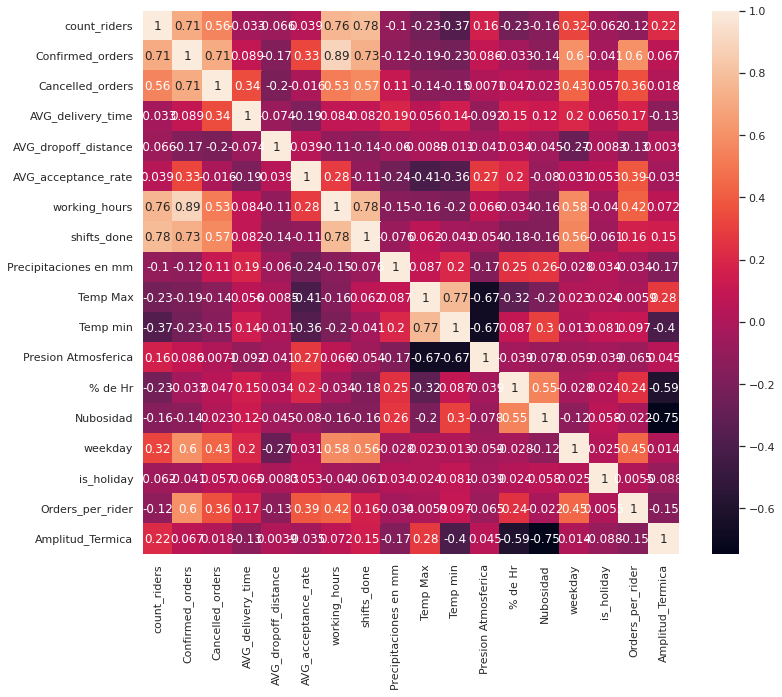

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(matrix_correlation, annot=True);

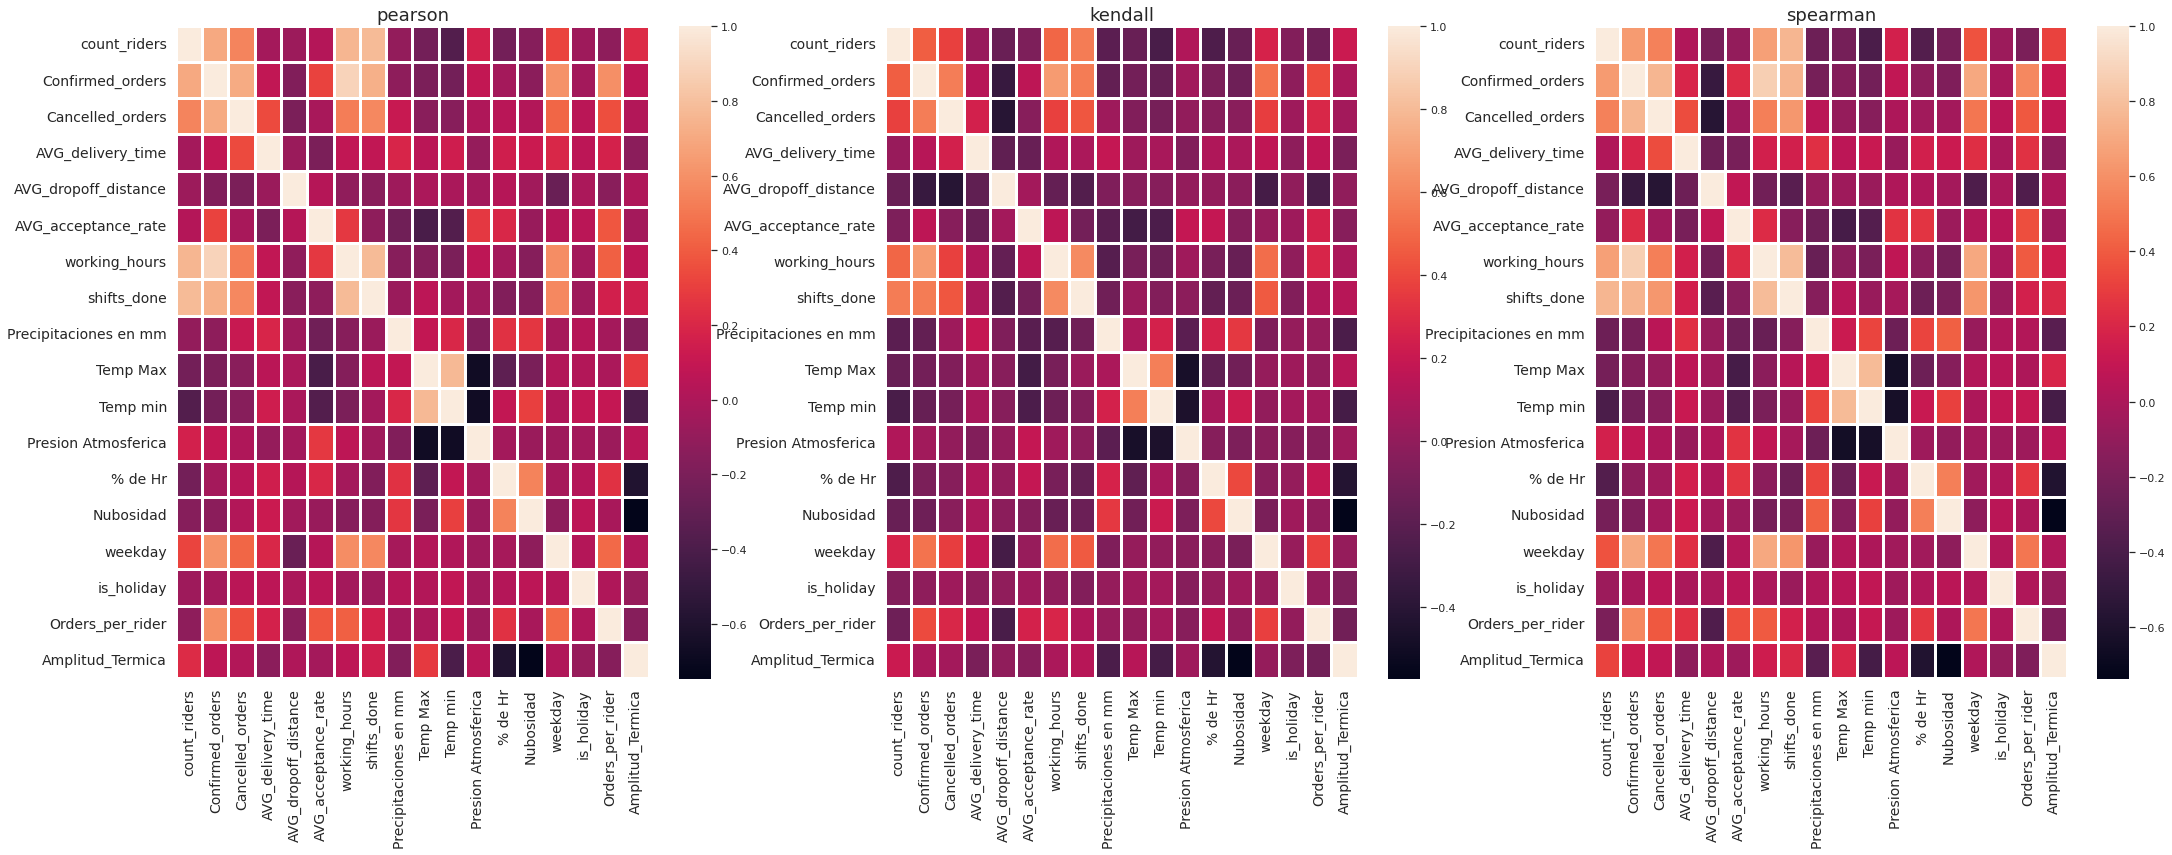

In [16]:
plt.figure(figsize=(36,12))
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = df_analisis.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)
  plt.yticks(fontsize=14)
  plt.xticks(fontsize=14)

In [17]:
df_analisis['day_of_week'] = df_analisis['fecha'].dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


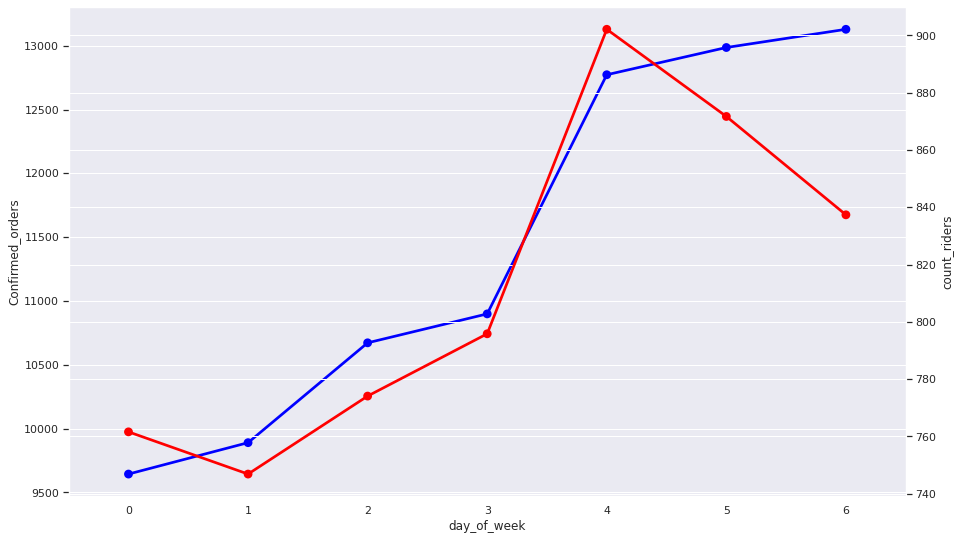

In [18]:
plt.figure(figsize=(15, 9))

grouped_day = df_analisis.groupby('day_of_week')['Confirmed_orders', 'count_riders'].mean().reset_index()
grouped_day

ax = sns.pointplot(x = 'day_of_week', y = 'Confirmed_orders', data=grouped_day, color = 'blue', label='Ordenes Confirmadas')
ax2 = ax.twinx()
ax = sns.pointplot(x = 'day_of_week', y = 'count_riders', data=grouped_day,  color = 'red', label='Cantidad de Riders', ax=ax2);


Con este gráfico se puede observar que la mayor cantidad de pedidos ocurre los días viernes, sábados y domingos.

[Text(0.5, 1.0, 'Cantidad de ordenes y el tiempo de delivery')]

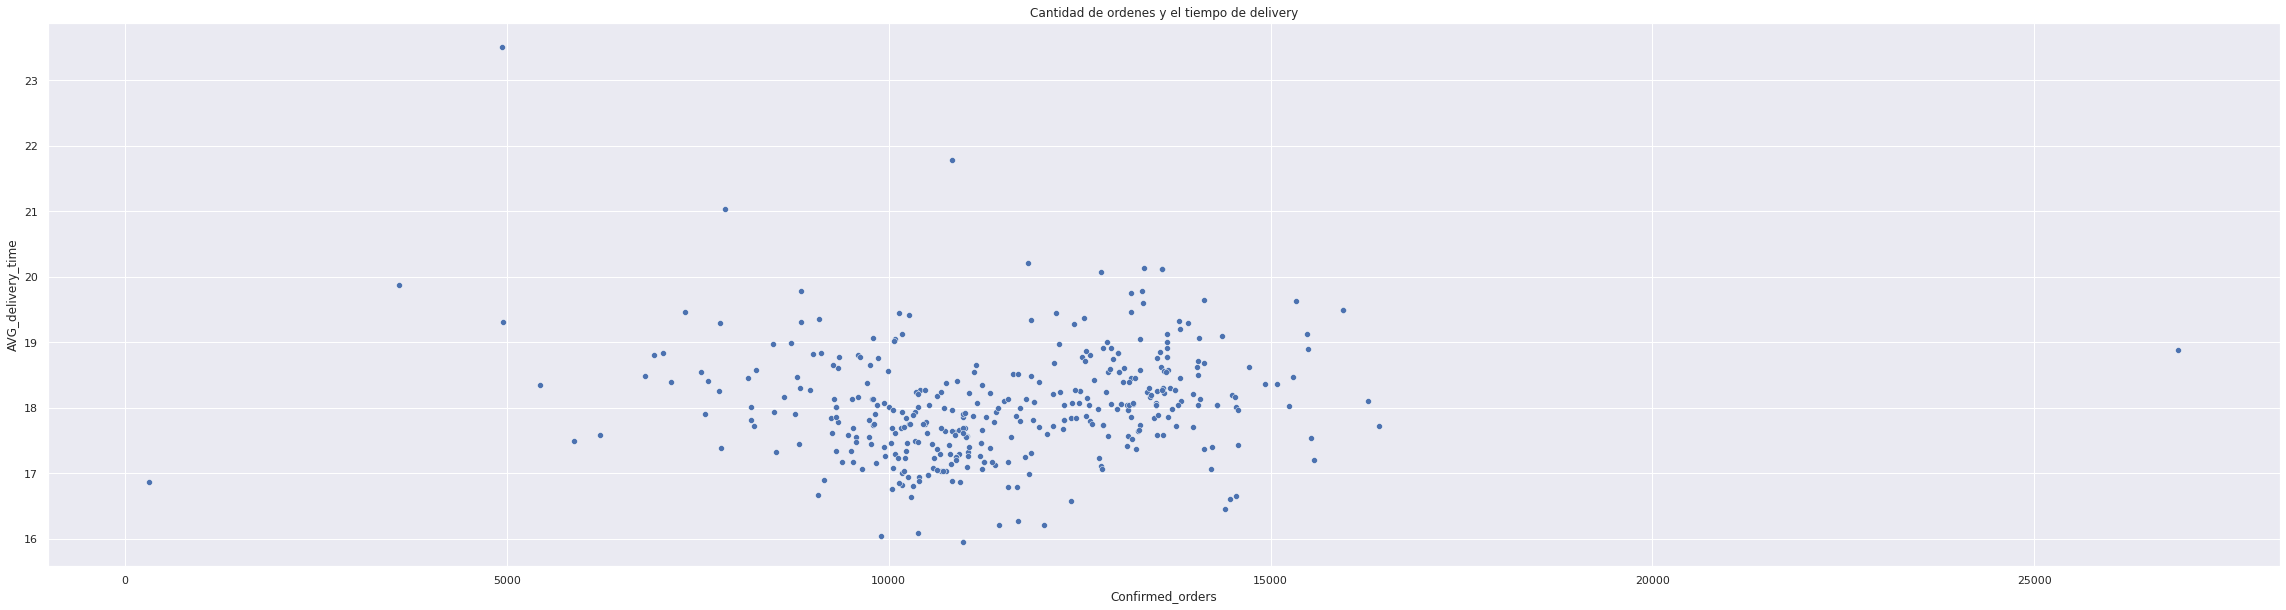

In [19]:
df_analisis.corr('spearman')['Confirmed_orders']['AVG_delivery_time']

# la correlacion es debil, se deberia probar con otra como por ejemplo payment

sns.scatterplot(x='Confirmed_orders', y='AVG_delivery_time', data=df_analisis).set(title='Cantidad de ordenes y el tiempo de delivery')

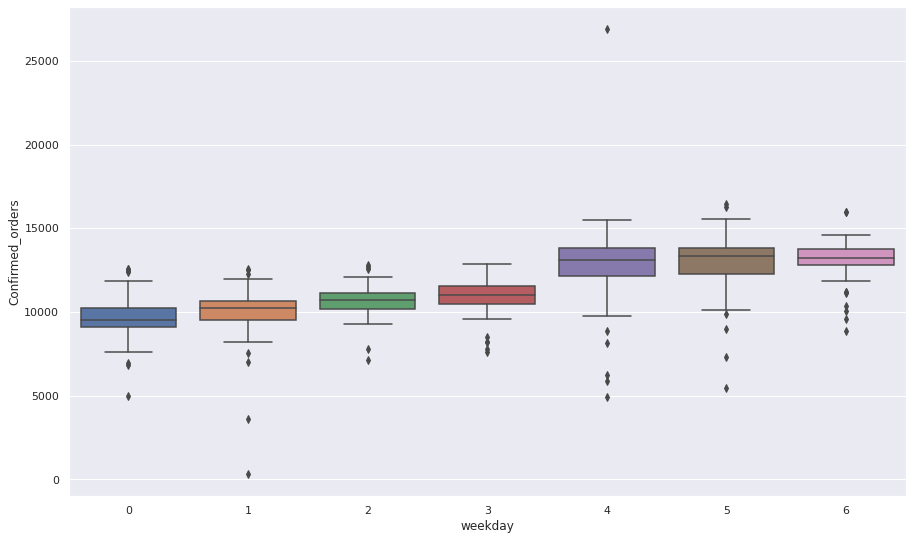

In [20]:
df_analisis.groupby('weekday')['Confirmed_orders'].sum().sort_values(ascending= False)
plt.figure(figsize=(15, 9))
sns.boxplot(x='weekday', y='Confirmed_orders', data=df_analisis)

# Análisis multivariado

Text(0.5, 1.01, 'Graficos de dispersion')

<Figure size 2160x1440 with 0 Axes>

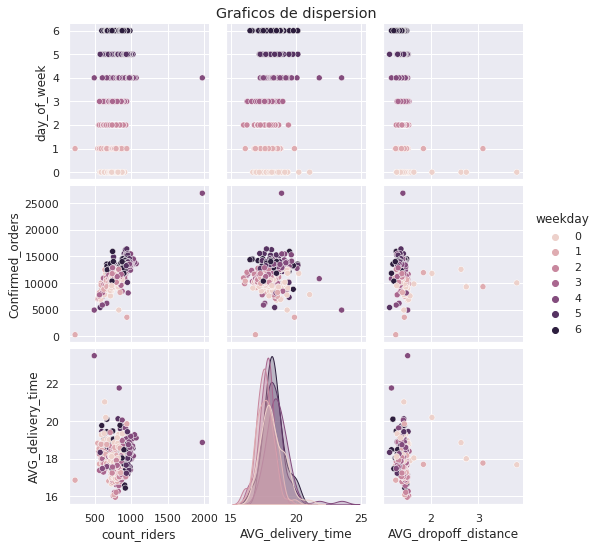

In [21]:
plt.figure(figsize=(30, 20))
g = sns.pairplot(
    df_analisis, 
    x_vars=['count_riders', 'AVG_delivery_time', 'AVG_dropoff_distance'],
    y_vars=['day_of_week', 'Confirmed_orders', 'AVG_delivery_time'], 
    hue='weekday')
g.fig.suptitle("Graficos de dispersion", y=1.01)

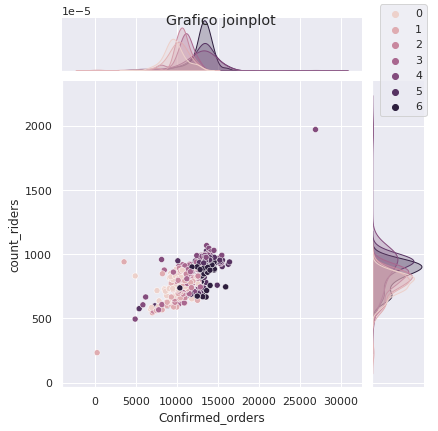

In [22]:
p = sns.jointplot(data=df_analisis, x="Confirmed_orders", y="count_riders", hue='weekday')
p.fig.suptitle("Grafico joinplot")
p.ax_joint.legend_._visible=False
p.fig.legend(bbox_to_anchor=(1, 1), loc=1)

Se ve una importante relación entre órdenes y riders

In [23]:
#Genero df con datos promedio agrupados por día de la semana

mean_data = df_analisis.groupby('weekday').mean()
mean_data

,count_riders,Confirmed_orders,Cancelled_orders,AVG_delivery_time,AVG_dropoff_distance,AVG_acceptance_rate,working_hours,shifts_done,Precipitaciones en mm,Temp Max,Temp min,Presion Atmosferica,% de Hr,Nubosidad,is_holiday,Orders_per_rider,Amplitud_Termica,day_of_week
weekday,,,,,,,,,,,,,,,,,,
0,761.584906,9644.037736,488.471698,18.180566,1.574528,0.922830,3395.924528,1353.886792,2.320755,26.050943,12.873585,966.520755,61.698113,3.264151,0.018868,12.717652,13.177358,0.0
1,746.849057,9890.037736,476.584906,17.722453,1.479434,0.918868,3605.226415,1398.226415,2.924528,25.160377,12.462264,967.449057,61.452830,3.754717,0.075472,13.251470,12.698113,1.0
2,774.075472,10672.264151,503.415094,17.545472,1.435660,0.919057,3830.830189,1491.075472,1.622642,25.813208,13.018868,966.484906,62.433962,3.226415,0.037736,13.895672,12.794340,2.0
3,795.826923,10898.961538,529.596154,17.698654,1.429615,0.917885,3855.269231,1510.826923,2.884615,26.259615,12.582692,966.278846,61.942308,2.711538,0.038462,13.821443,13.676923,3.0
4,902.127273,12772.527273,626.290909,18.628182,1.411273,0.922364,4644.581818,1809.036364,2.444444,25.842593,13.370370,965.709259,60.481481,3.203704,0.090909,14.194430,12.472222,4.0
5,871.696429,12985.892857,643.571429,18.233929,1.402679,0.920357,4622.892857,1951.410714,1.178571,26.478571,13.496429,965.516071,59.625000,2.767857,0.053571,14.961846,12.982143,5.0
6,837.358209,13128.552239,652.656716,18.257015,1.378209,0.923284,4377.492537,1822.985075,2.164179,25.828358,12.531343,966.597015,61.582090,2.492537,0.044776,15.844784,13.297015,6.0


In [24]:
columns = mean_data[['AVG_delivery_time', 'count_riders', 'AVG_dropoff_distance', 'AVG_acceptance_rate']]
columns

,AVG_delivery_time,count_riders,AVG_dropoff_distance,AVG_acceptance_rate
weekday,,,,
0,18.180566,761.584906,1.574528,0.922830
1,17.722453,746.849057,1.479434,0.918868
2,17.545472,774.075472,1.435660,0.919057
3,17.698654,795.826923,1.429615,0.917885
4,18.628182,902.127273,1.411273,0.922364
5,18.233929,871.696429,1.402679,0.920357
6,18.257015,837.358209,1.378209,0.923284


In [25]:
import plotly.graph_objects as go
import plotly.express as px

In [26]:
#grafico 3dimenseiones 
fig = px.scatter_3d(df, x="Confirmed_orders", y="count_riders", z='AVG_delivery_time', color='weekday', opacity=0.8)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  title={
        'text': "Grafico 3D de variables en iris data",
        'y':0.9,
        'x':0.05
         })
fig.show()

# Forecasting de cantidad de órdenes con Prophet

In [27]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 143 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6637947 sha256=9a74f3b7df9d9d6e60e5ced165688731de016481a7dcebe947bf75bdc44d184c
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [28]:
#Importo Prophet

from fbprophet import Prophet

In [29]:
#Agrupamos el dataset por semana

df['fecha'] = pd.to_datetime(df['fecha']) - pd.to_timedelta(7, unit='d')
df11 = df.groupby([pd.Grouper(key='fecha', freq='W-MON')])['Confirmed_orders'].sum().reset_index().sort_values('fecha')
print (df11)

        fecha  Confirmed_orders
0  2020-12-28             27943
1  2021-01-04             56698
2  2021-01-11             60527
3  2021-01-18             69334
4  2021-01-25             71322
..        ...               ...
82 2022-07-25            109229
83 2022-08-01            105553
84 2022-08-08            113482
85 2022-08-15            121345
86 2022-08-22             69258

[87 rows x 2 columns]


In [30]:
#Genero df con q de órdenes

df_prophetOrders = df11 
df_prophetOrders.columns = ['ds', 'y']
df_prophetOrders.head()

,ds,y
0,2020-12-28,27943
1,2021-01-04,56698
2,2021-01-11,60527
3,2021-01-18,69334
4,2021-01-25,71322


In [31]:
#Entreno

mOrders = Prophet()
model = mOrders.fit(df_prophetOrders)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
#Predicción de órdenes

futureOrders = mOrders.make_future_dataframe(periods=100,freq='D')
forecast = mOrders.predict(futureOrders)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-28,77222.052911,56899.872908,97492.755827,77222.052911,77222.052911,0.0,0.0,0.0,0.0,0.0,0.0,77222.052911
1,2021-01-04,77548.715430,58417.239264,97025.528312,77548.715430,77548.715430,0.0,0.0,0.0,0.0,0.0,0.0,77548.715430
2,2021-01-11,77875.377948,56916.956125,97721.891159,77875.377948,77875.377948,0.0,0.0,0.0,0.0,0.0,0.0,77875.377948
3,2021-01-18,78202.040466,59239.635052,99509.857358,78202.040466,78202.040466,0.0,0.0,0.0,0.0,0.0,0.0,78202.040466
4,2021-01-25,78528.702983,58365.213796,96619.485672,78528.702983,78528.702983,0.0,0.0,0.0,0.0,0.0,0.0,78528.702983


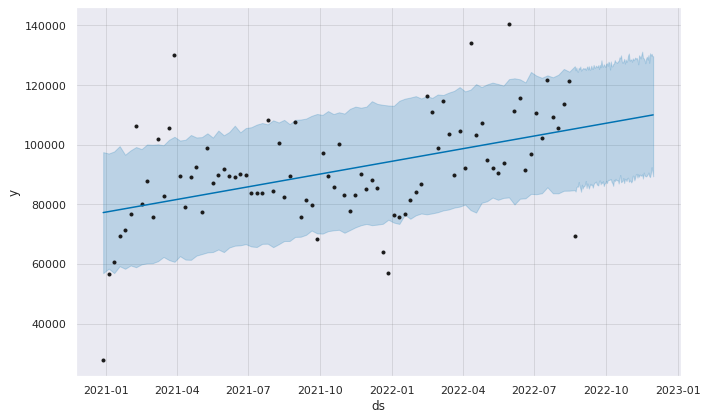

In [33]:
plot1 = mOrders.plot(forecast)

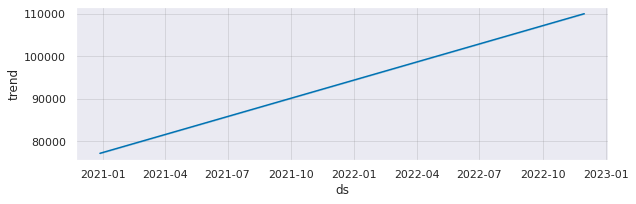

In [34]:
fig2 = mOrders.plot_components(forecast)


In [35]:
#Devolvemos dataset con la prediccion realizada con Prophet

forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-28,77222.052911,56899.872908,97492.755827,77222.052911,77222.052911,0.0,0.0,0.0,0.0,0.0,0.0,77222.052911
1,2021-01-04,77548.715430,58417.239264,97025.528312,77548.715430,77548.715430,0.0,0.0,0.0,0.0,0.0,0.0,77548.715430
2,2021-01-11,77875.377948,56916.956125,97721.891159,77875.377948,77875.377948,0.0,0.0,0.0,0.0,0.0,0.0,77875.377948
3,2021-01-18,78202.040466,59239.635052,99509.857358,78202.040466,78202.040466,0.0,0.0,0.0,0.0,0.0,0.0,78202.040466
4,2021-01-25,78528.702983,58365.213796,96619.485672,78528.702983,78528.702983,0.0,0.0,0.0,0.0,0.0,0.0,78528.702983


# Forecasting de cantidad de riders con Prophet

In [36]:
df['fecha'] = pd.to_datetime(df['fecha']) - pd.to_timedelta(7, unit='d')
df22 = df.groupby([pd.Grouper(key='fecha', freq='W-MON')])['count_riders'].sum().reset_index().sort_values('fecha')
print (df22)

        fecha  count_riders
0  2020-12-21          2264
1  2020-12-28          4146
2  2021-01-04          4268
3  2021-01-11          4400
4  2021-01-18          4564
..        ...           ...
82 2022-07-18          7384
83 2022-07-25          7488
84 2022-08-01          7712
85 2022-08-08          8699
86 2022-08-15          5421

[87 rows x 2 columns]


In [37]:
#Genero df con q de riders

df_prophetRiders = df22
df_prophetRiders.columns = ['ds', 'y']
df_prophetRiders.head()

,ds,y
0,2020-12-21,2264
1,2020-12-28,4146
2,2021-01-04,4268
3,2021-01-11,4400
4,2021-01-18,4564


In [38]:
#Entreno

mRiders = Prophet(interval_width=0.95, daily_seasonality=True)
model2 = mRiders.fit(df_prophetRiders)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [39]:
#Predicción de riders

futureRiders = mRiders.make_future_dataframe(periods=100,freq='D')
forecast2 = mRiders.predict(futureRiders)
forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-21,308.934063,3075.024190,7327.835962,308.934063,308.934063,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,0.0,0.0,0.0,5247.682506
1,2020-12-28,337.252701,3409.870528,7266.566583,337.252701,337.252701,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,0.0,0.0,0.0,5276.001144
2,2021-01-04,365.571339,3325.020821,7347.597044,365.571339,365.571339,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,0.0,0.0,0.0,5304.319782
3,2021-01-11,393.889978,3247.977885,7374.815635,393.889978,393.889978,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,0.0,0.0,0.0,5332.638420
4,2021-01-18,422.208616,3343.086860,7527.347208,422.208616,422.208616,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,0.0,0.0,0.0,5360.957058


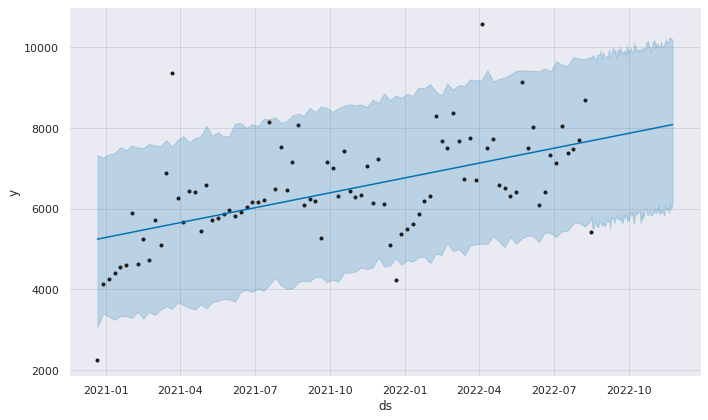

In [40]:
plot2 = mRiders.plot(forecast2)

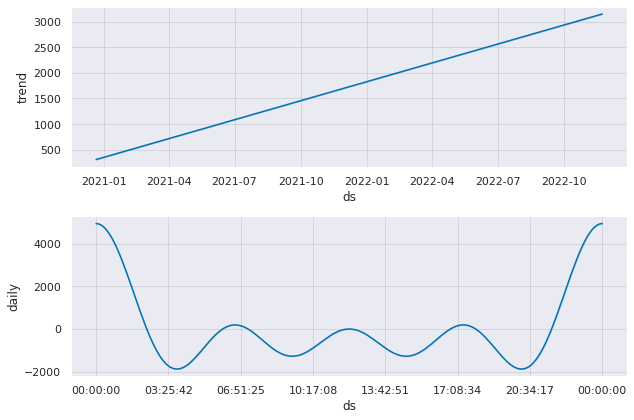

In [41]:
fig3 = mRiders.plot_components(forecast2)

In [42]:
#Devolvemos dataset con la prediccion de Prophey

forecast2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-21,308.934063,3075.024190,7327.835962,308.934063,308.934063,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,0.0,0.0,0.0,5247.682506
1,2020-12-28,337.252701,3409.870528,7266.566583,337.252701,337.252701,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,0.0,0.0,0.0,5276.001144
2,2021-01-04,365.571339,3325.020821,7347.597044,365.571339,365.571339,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,0.0,0.0,0.0,5304.319782
3,2021-01-11,393.889978,3247.977885,7374.815635,393.889978,393.889978,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,0.0,0.0,0.0,5332.638420
4,2021-01-18,422.208616,3343.086860,7527.347208,422.208616,422.208616,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,4938.748442,0.0,0.0,0.0,5360.957058


# DecisionTree Regressor

In [43]:
#Drop de columnas que no queremos para el modelo de decisionTree regression

regresion = df.drop(['fecha','Precipitaciones en mm', 'event_type','Temp Max','Temp min','Presion Atmosferica','% de Hr','Nubosidad'], axis=1)

regresion.head()

,count_riders,Confirmed_orders,Cancelled_orders,AVG_delivery_time,AVG_dropoff_distance,AVG_acceptance_rate,working_hours,shifts_done,weekday,is_holiday
0,495,4941,380,23.50,1.52,0.91,2057.0,800.0,4,1
1,598,7337,348,19.46,1.53,0.91,3701.0,1539.0,5,0
2,598,8851,546,19.78,1.45,0.89,3405.0,1508.0,6,0
3,573,6814,364,18.49,1.52,0.89,2822.0,1072.0,0,0
4,544,7040,344,18.84,1.53,0.87,2816.0,952.0,1,0


In [44]:
#División de x e y

x = regresion.drop('Confirmed_orders', axis=1)
y = regresion['Confirmed_orders']

In [45]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x = sc_x.fit_transform(x)
x = pd.DataFrame(x)

In [46]:
def TimeSeriesTrainTestSplit(x, y, test_size):
    
        test_index = int(len(x)*(1-test_size))
    
        X_train = x.iloc[:test_index]
        y_train = y.iloc[:test_index]
        X_test = x.iloc[test_index:]
        y_test = y.iloc[test_index:]
        return X_train, y_train, X_test, y_test
    
X_train, y_train, X_test, y_test = TimeSeriesTrainTestSplit(x,y, 0.2)

In [49]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
X_train[:] = np.nan_to_num(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
from sklearn.tree import DecisionTreeRegressor #Importamos el modelo
tree = DecisionTreeRegressor(max_depth=4, random_state = 42) #Creamos el modelo

In [52]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       526 non-null    float64
 1   1       526 non-null    float64
 2   2       526 non-null    float64
 3   3       526 non-null    float64
 4   4       526 non-null    float64
 5   5       526 non-null    float64
 6   6       526 non-null    float64
 7   7       526 non-null    float64
 8   8       526 non-null    float64
dtypes: float64(9)
memory usage: 37.1 KB


In [53]:
#Entrenamos el modelo
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [54]:
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
X_test[:] = np.nan_to_num(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [57]:
X_test.shape

(132, 9)

In [58]:
y_test.shape

(132,)

In [59]:
#Score del DecisionTree Regressor

score = tree.score(X_test, y_test)
score

0.10624447925710168

# Regresión lineal

In [60]:
df_regression = df.drop(['fecha','Precipitaciones en mm', 'event_type','Temp Max','Temp min','Presion Atmosferica','% de Hr','Nubosidad'], axis=1)

In [61]:
x = df_regression.drop('Confirmed_orders', axis=1)
y = df_regression['Confirmed_orders']

In [62]:
#Split train test

X_train = x.iloc[:555,:]
X_test = x.iloc[555:,:]
y_train = y.iloc[:555]
y_test = y.iloc[555:]

In [63]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [64]:
coeff_df = pd.DataFrame(regressor.coef_[0], x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
count_riders,-0.914592
Cancelled_orders,-0.914592
AVG_delivery_time,-0.914592
AVG_dropoff_distance,-0.914592
AVG_acceptance_rate,-0.914592
working_hours,-0.914592
shifts_done,-0.914592
weekday,-0.914592
is_holiday,-0.914592


In [65]:
y_pred = regressor.predict(X_test)

In [66]:
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_compare

,Actual,Predicted
555,13073,11844.708638
556,13213,12187.427689
557,14776,14737.573756
558,16067,15282.666765
559,15590,14244.299595
...,...,...
653,12401,11646.879190
654,13066,12703.640295
655,15833,14833.015745
656,15957,14557.232760


In [67]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 859.1980025395278
Mean Squared Error: 1118738.9279860528
Root Mean Squared Error: 1057.7045560959132


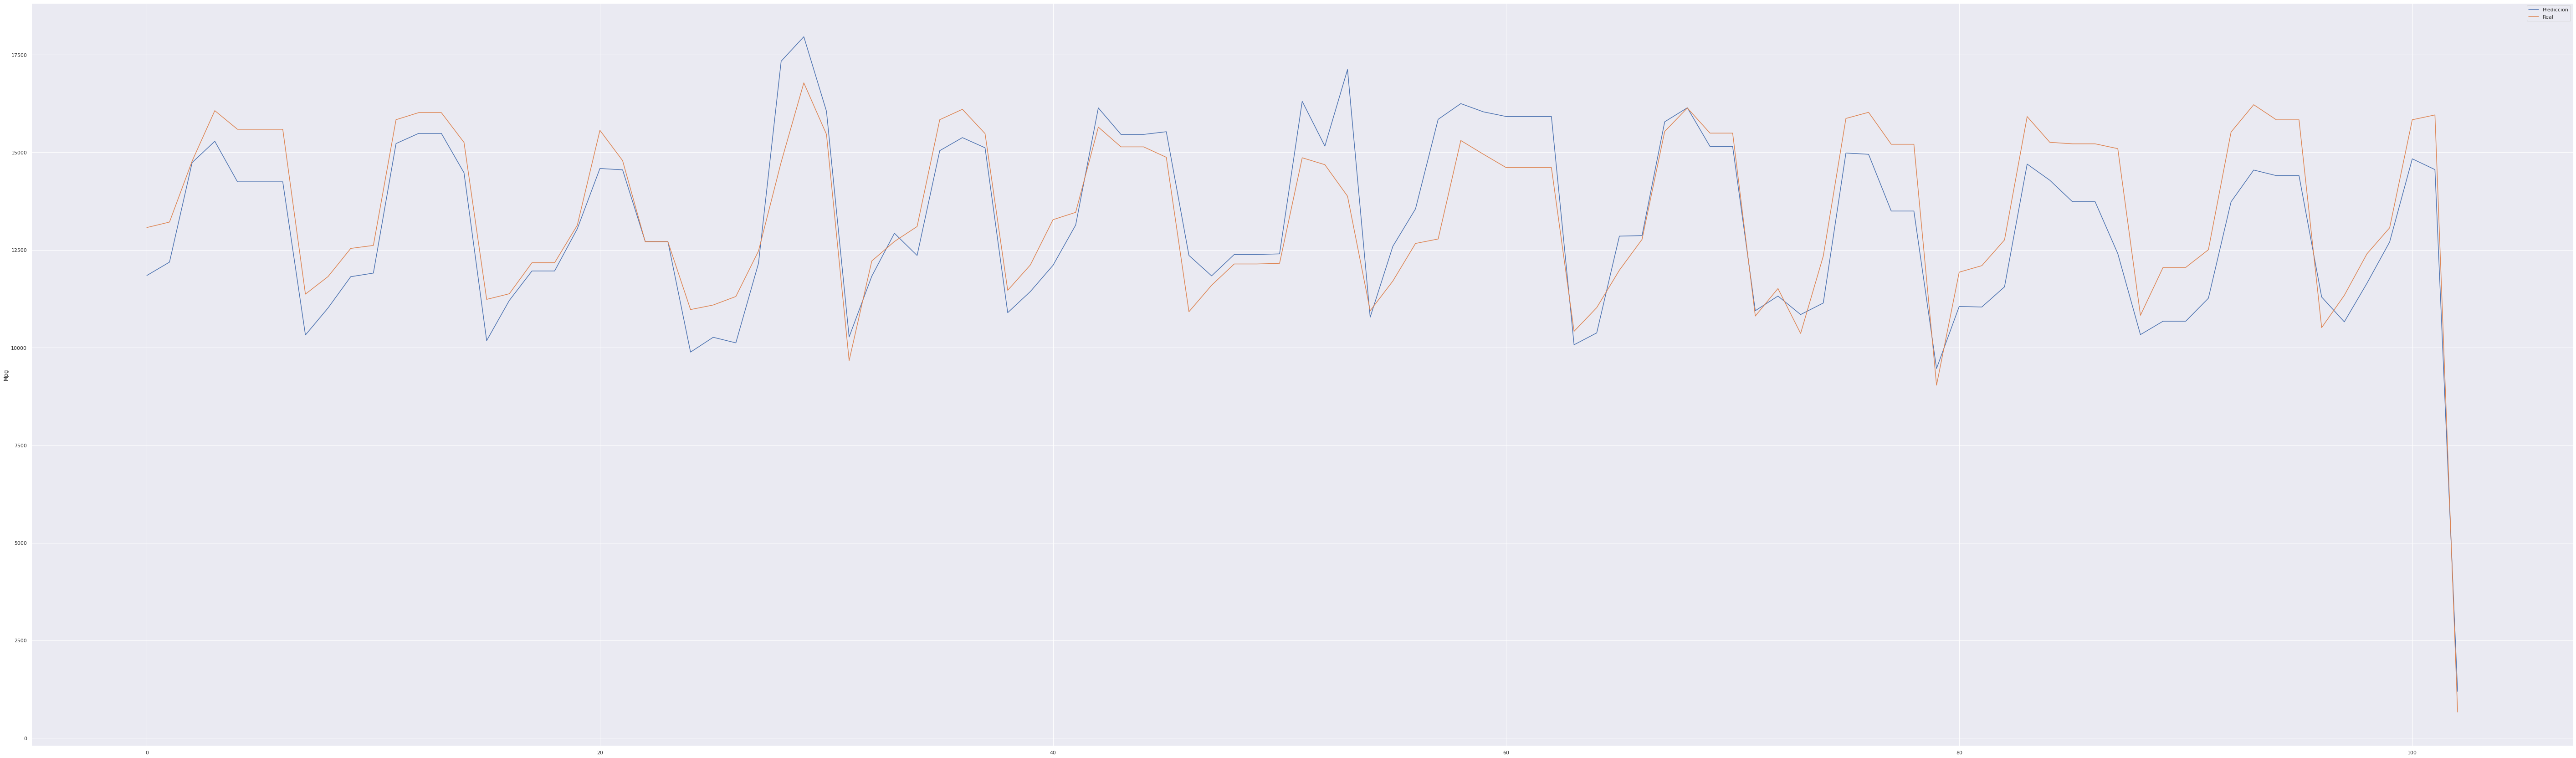

In [68]:
plt.figure(figsize = (100,30))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test.values, label='Real')

plt.ylabel('Mpg')

plt.legend()
plt.show()

In [69]:
print('Puntaje Testing: ', r2_score(y_test, y_pred))

Puntaje Testing:  0.7875965736887691


In [70]:
import matplotlib.dates as mdates
from datetime import datetime
date_time_str = '2022-02-03'
date_time_obj = datetime. strptime(date_time_str, '%Y-%m-%d')

mdates.date2num(date_time_obj)

738189.0